In [28]:
# importing the Dataset
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
messages = pd.read_csv('SMSSpamCollection', sep='\t',names=["label", "message"])

In [3]:
messages.shape

(5572, 2)

In [4]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
messages.message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [6]:
messages.label

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

### Data cleaning and preprocessing

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [8]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

### Creating the Bag of Words model

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
cv = CountVectorizer(max_features=5000)

In [11]:
X = cv.fit_transform(corpus).toarray()

In [12]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [13]:
X.shape

(5572, 5000)

### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

#### Training model using Naive bayes classifier

In [15]:
from sklearn.naive_bayes import MultinomialNB

In [16]:
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [17]:
y_pred=spam_detect_model.predict(X_test)

In [18]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
 
 

In [20]:
cf_matrix = confusion_matrix(y_test,y_pred)

In [21]:
print(cf_matrix)

[[946   9]
 [  8 152]]


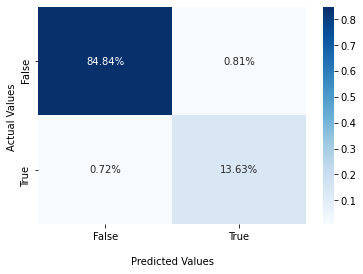

In [27]:
 
# ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

 
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [48]:
 #Correct predictions
946+152

1098

In [49]:
print('Acuuracy is --> ',accuracy_score(y_test,y_pred)*100)

Acuuracy is -->  98.47533632286995


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.94      0.95      0.95       160

    accuracy                           0.98      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115

